In [2]:
import pandas as pd
import numpy as np
# import geopandas as gpd
import matplotlib.pyplot as plt
# import shapefile as shp
import seaborn as sns
from scipy.stats import ttest_ind


In [3]:
data = pd.read_csv("listings.csv") 

,Rating,Price
Rating,1.000000,-0.107363
Price,-0.107363,1.000000


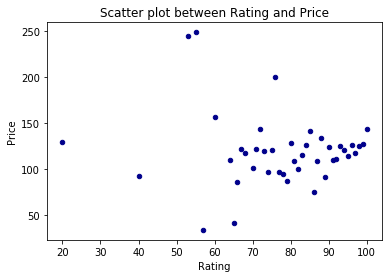

In [4]:
reviews = data.drop(['listing_url', 'scrape_id','name','summary','space','description','experiences_offered',
                  'neighborhood_overview','requires_license','jurisdiction_names','instant_bookable',
                  'cancellation_policy','require_guest_profile_picture','calculated_host_listings_count',
                  'reviews_per_month','last_scraped','notes','transit','thumbnail_url','medium_url',
                  'picture_url','xl_picture_url','host_id','host_url','last_review','review_scores_accuracy',
                 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
                 'review_scores_value','license','require_guest_phone_verification','host_name','host_since','host_location',
                 'host_about','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
                 'host_thumbnail_url','calendar_updated','has_availability','availability_30','availability_60',
                 'availability_90','availability_365','calendar_last_scraped','first_review','host_picture_url',
                 'host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic',
                 'host_identity_verified','street','neighbourhood','guests_included','minimum_nights','maximum_nights',
                 'number_of_reviews','neighbourhood_cleansed','neighbourhood_group_cleansed','city',
                 'state','market','smart_location','country_code','country','beds','bed_type','amenities','square_feet','weekly_price',
                 'monthly_price','security_deposit','cleaning_fee','extra_people','latitude','longitude','is_location_exact',
                 'property_type','room_type','accommodates','bathrooms','bedrooms','id','zipcode'], axis=1)

reviews = reviews.replace(r'\$', '', regex=True)
reviews = reviews.dropna()
price = reviews.price = pd.to_numeric(reviews.price, errors='coerce').fillna(0).astype(np.int64)
reviews['price'] = price
reviews = reviews.rename(columns={"review_scores_rating": "Rating","price": "Price"})
reviews = reviews.sort_values('Rating', ascending=False)
reviews = reviews.groupby(['Rating'])['Price'].mean().to_frame('Price').reset_index()
reviews = reviews.round({'Price': 2 })

reviews.plot.scatter(x='Rating', y='Price',c="DarkBlue", title= "Scatter plot between Rating and Price");
reviews.corr(method ='pearson')
# reviews

In [73]:
room_type = data.drop(['listing_url', 'scrape_id','name','summary','space','description','experiences_offered',
                  'neighborhood_overview','requires_license','jurisdiction_names','instant_bookable',
                  'cancellation_policy','require_guest_profile_picture','calculated_host_listings_count',
                  'reviews_per_month','last_scraped','notes','transit','thumbnail_url','medium_url',
                  'picture_url','xl_picture_url','host_id','host_url','last_review','review_scores_accuracy',
                 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
                 'review_scores_value','license','require_guest_phone_verification','host_name','host_since','host_location',
                 'host_about','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
                 'host_thumbnail_url','calendar_updated','has_availability','availability_30','availability_60',
                 'availability_90','availability_365','calendar_last_scraped','first_review','host_picture_url',
                 'host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic',
                 'host_identity_verified','street','neighbourhood','guests_included','minimum_nights','maximum_nights',
                 'number_of_reviews','neighbourhood_cleansed','neighbourhood_group_cleansed','city',
                 'state','market','smart_location','country_code','country','beds','bed_type','amenities','square_feet','weekly_price',
                 'monthly_price','security_deposit','cleaning_fee','extra_people','latitude','longitude','is_location_exact',
                 'property_type','accommodates','bathrooms','bedrooms','id','zipcode','review_scores_rating'], axis=1)

room_type = room_type.replace(r'\$', '', regex=True)


room_type = room_type.apply(lambda col: pd.factorize(col, sort=True)[0])
room_type = room_type.dropna()
price = room_type.price = pd.to_numeric(room_type.price, errors='coerce').fillna(0).astype(np.int64)
room_type['price'] = price

room_type

rt1 = room_type.loc[room_type["room_type"] != 0 ] # Private room and Shared room
rt2 = room_type.loc[room_type["room_type"] != 1 ] # Entire home/apt and Shared room
rt3 = room_type.loc[room_type["room_type"] != 2 ] # Entire home/apt and Private room

ttest_ind(rt1['room_type'], rt1['price'])
ttest_ind(rt2['room_type'], rt2['price'])
ttest_ind(rt3['room_type'], rt3['price'])


Ttest_indResult(statistic=-88.79520891590346, pvalue=0.0)

In [69]:
room_type["room_type"]= room_type["room_type"].replace(0, "Entire home/apt") 
room_type["room_type"]= room_type["room_type"].replace(1, "Private room") 
room_type["room_type"]= room_type["room_type"].replace(2, "Shared room") 
# room_type

,room_type,price
0,Entire home/apt,116.376623
1,Private room,195.827586
2,Shared room,176.376068


In [39]:
zipcode = data.drop(['listing_url', 'scrape_id','name','summary','space','description','experiences_offered',
                  'neighborhood_overview','requires_license','jurisdiction_names','instant_bookable',
                  'cancellation_policy','require_guest_profile_picture','calculated_host_listings_count',
                  'reviews_per_month','last_scraped','notes','transit','thumbnail_url','medium_url',
                  'picture_url','xl_picture_url','host_id','host_url','last_review','review_scores_accuracy',
                 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
                 'review_scores_value','license','require_guest_phone_verification','host_name','host_since','host_location',
                 'host_about','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
                 'host_thumbnail_url','calendar_updated','has_availability','availability_30','availability_60',
                 'availability_90','availability_365','calendar_last_scraped','first_review','host_picture_url',
                 'host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic',
                 'host_identity_verified','street','neighbourhood','guests_included','minimum_nights','maximum_nights',
                 'number_of_reviews','review_scores_rating','neighbourhood_cleansed','neighbourhood_group_cleansed','city',
                 'state','market','smart_location','country_code','country','beds','bed_type','amenities','square_feet','weekly_price',
                 'monthly_price','security_deposit','cleaning_fee','extra_people','latitude','longitude','is_location_exact',
                 'property_type','room_type','accommodates','bathrooms','bedrooms','id'], axis=1)

zipcode = zipcode.replace(r'\$', '', regex=True)
zipcode.isnull().sum()

zipcode = zipcode.dropna()

price = zipcode.price = pd.to_numeric(zipcode.price, errors='coerce').fillna(0).astype(np.int64)

zipcode['price'] = price
zipcode = zipcode.groupby(['zipcode'])['price'].mean().to_frame('price').reset_index()
zipcode.rename(columns={"zipcode": "Zipcode","price": "Price"})
zipcode = zipcode.drop(27)
zipcode = zipcode.round({'price': 2})

In [40]:
sns.set(style= 'whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))
shp_path = 'seattle.shp'
seattle_shp = shp.Reader(shp_path)

In [42]:
def read_shapefile(seattle):
    #fetching the headings from the shape file
    fields = [x[0] for x in seattle.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in seattle.records()]
    
    shps = [s.points for s in seattle.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

df = read_shapefile(seattle_shp)

In [43]:
def plot_shape(id, s=None):

    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
    # #storing the id number to be worked upon
    shape_ex = seattle_shp.shape(id)
    # #NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    # #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
    # #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    # #plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [44]:
# ZIP = 98031
#to get the id of the city map to be plotted
# com_id = df[df.ZIP == 98031].index.get_values()[0]
# plot_shape(com_id, ZIP)
# seattle_shp.shape(com_id)

In [46]:
def plot_map(city,df, x_lim = None, y_lim = None, figsize = (11,9)):
    figsize = (11,9)
    plt.figure(figsize = figsize)
    id=0
    for shape in city.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        try:
            pr = str(zipcode.get_value(zipcode[zipcode.zipcode == 
                     (df.iloc[id].ZIP).astype(str)].index.get_values()[0],'price'))
            plt.plot(x, y, 'k')
        except:
            id = id+1
            continue

        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            try:
                pr = str(zipcode.get_value(zipcode[zipcode.zipcode == 
                     (df.iloc[id].ZIP).astype(str)].index.get_values()[0],'price'))
                plt.text(x0, y0, pr, fontsize=10)
                id = id+1
            except:
                id = id+1
                continue
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    #calling the function and passing required parameters to plot the full map

# plot = plot_map(seattle_shp,df)

In [47]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [48]:
def plot_cities_data(seattle_shp, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(seattle_shp)
    city_id = []
    idx = 0
    for i in cities:
        try:  
            pr = str(zipcode.get_value(zipcode[zipcode.zipcode == 
                     (df.iloc[idx].ZIP).astype(str)].index.get_values()[0],'price'))

            city_id.append(df[df.ZIP == i].index.get_values()[0])
            idx += 1
        except:
            idx += 1
            continue
    plot_map_fill_multiples_ids_tone(seattle_shp, data, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
def plot_map_fill_multiples_ids_tone(seattle_shp, data, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    idx = 0
    for shape in seattle_shp.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        try:
            
            pr = str(zipcode.get_value(zipcode[zipcode.zipcode == 
                     (df.iloc[idx].ZIP).astype(str)].index.get_values()[0],'price'))
#             plt.plot(x, y, 'k')
            idx += 1

        except:
            idx += 1
            continue
            
        ax.plot(x, y, 'k')

    for id in city:
        try:
            pr = str(zipcode.get_value(zipcode[zipcode.zipcode == 
                     (df.iloc[id].ZIP).astype(str)].index.get_values()[0],'price'))
            pr_zipcode = str(df.iloc[id].ZIP)
        except:
            ali = 0
        shape_ex = seattle_shp.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]           
        price_index = data[data == float(pr)].index[0]
        ax.fill(x_lon,y_lat, color_ton[price_index])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, pr_zipcode, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [51]:
price = zipcode.price
price.shape
title = "Price Per Zipcode Heat Map"
data = price
names = df.ZIP
plot_cities_data(seattle_shp, title, names, data, 1, True)